<a href="https://colab.research.google.com/github/Harshitha14-05/CreditCard_fraudDetection/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [3]:
data = pd.read_csv("/content/creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
print(data.shape)
print(data.describe())

(11959, 31)
               Time            V1            V2            V3            V4  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean    8009.996822     -0.216230      0.277097      0.889505      0.282606   
std     6204.332248      1.583914      1.308884      1.331824      1.478162   
min        0.000000    -27.670569    -34.607649    -22.804686     -4.657545   
25%     2542.000000     -0.978944     -0.261503      0.417186     -0.622456   
50%     6662.000000     -0.340742      0.256346      0.951223      0.213029   
75%    12382.000000      1.161273      0.883626      1.613678      1.159141   
max    20642.000000      1.960497      9.092123      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean      -0.086585      0.139986     -0.121943     -0.048727      0.911579   
std        1.191776      1.306285      

In [6]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.004367545775239375
Fraud Cases: 52
Valid Transactions: 11906


In [7]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,52.000000
mean,97.724808
std,321.188775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.772500
max,1809.680000


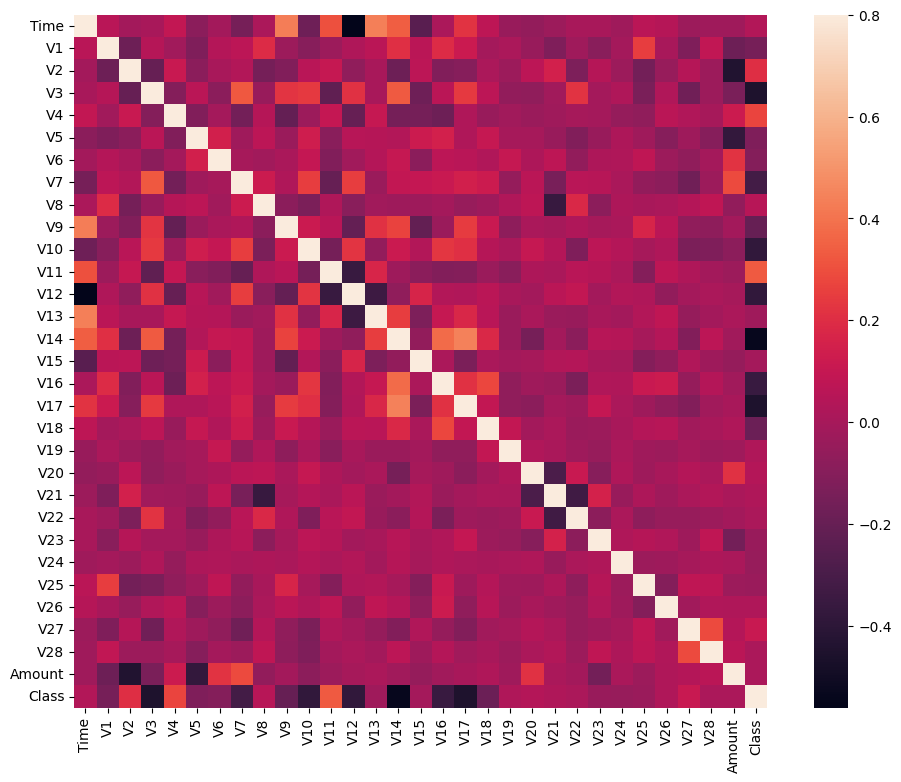

In [8]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [9]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(11959, 30)
(11959,)


In [10]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [11]:
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Importing the RandomForestClassifier
import numpy as np  # Import numpy for NaN handling


In [12]:
model = RandomForestClassifier(random_state=42)  # Initialize the model
model.fit(xTrain, yTrain)  # Train the model using the training data


n_outliers = len(fraud)
yPred = model.predict(xTest)  # Predict on the test data
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

The model used is Random Forest classifier


In [13]:
nan_indices = np.isnan(yTest)  # Find indices where yTest is NaN
yTest_clean = yTest[~nan_indices]  # Remove NaN values from yTest
yPred_clean = yPred[~nan_indices]  # Remove corresponding predictions

acc = accuracy_score(yTest_clean, yPred_clean)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest_clean, yPred_clean)
print("The precision is {}".format(prec))

rec = recall_score(yTest_clean, yPred_clean)
print("The recall is {}".format(rec))

f1 = f1_score(yTest_clean, yPred_clean)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest_clean, yPred_clean)
print("The Matthews correlation coefficient is{}".format(MCC))

The accuracy is 0.999581764951903
The precision is 1.0
The recall is 0.9
The F1-Score is 0.9473684210526315
The Matthews correlation coefficient is0.9484841412732484


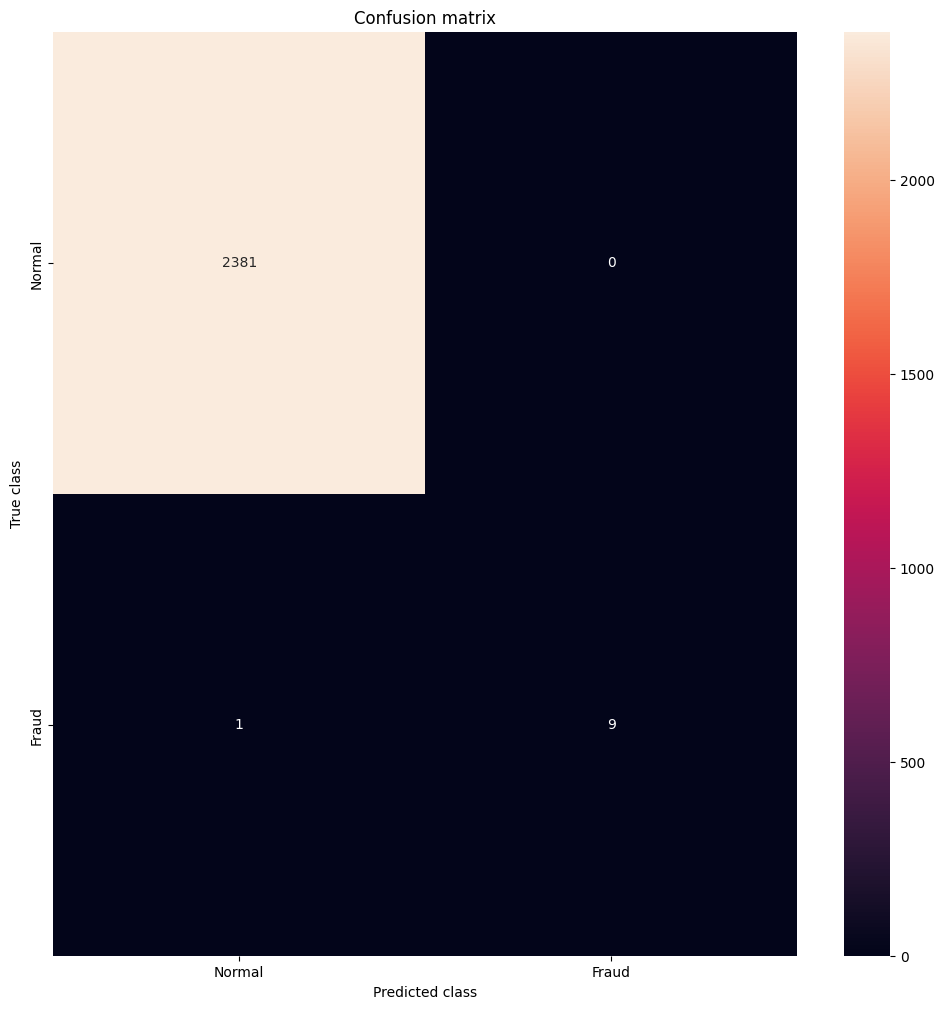

In [14]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']

# Remove NaN values from yTest and corresponding predictions in yPred
yTest_clean = yTest[~np.isnan(yTest)]
yPred_clean = yPred[~np.isnan(yTest)]

conf_matrix = confusion_matrix(yTest_clean, yPred_clean)  # Use cleaned data
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()